## Telco Churn Prediction

In [1]:
# Install pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [2]:
# Libraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from pycaret.classification import *

In [31]:
# Load data
df = pd.read_csv("telco.csv")

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [13]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'numAdminTickets',
 'numTechTickets',
 'Churn']

In [32]:
# Drop customer ID
df.drop('customerID', axis=1, inplace=True)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [33]:
# Rescale
df_scale = df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges',
                         'numAdminTickets','numTechTickets']]
scaler = preprocessing.MinMaxScaler()
df_scale = scaler.fit_transform(df_scale)
df_scale = pd.DataFrame(df_scale)
#df_scale.reset_index(drop=True, inplace=True)

In [38]:
df_scale.columns =['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','numAdminTickets','numTechTickets']

In [34]:
# Label encode categorical variables
df["gender"] = df["gender"].astype('category')
df["Partner"] = df["Partner"].astype('category')
df["Dependents"] = df["Dependents"].astype('category')
df["PhoneService"] = df["PhoneService"].astype('category')
df["MultipleLines"] = df["MultipleLines"].astype('category')
df["InternetService"] = df["InternetService"].astype('category')
df['OnlineSecurity'] = df["OnlineSecurity"].astype('category')
df['OnlineBackup'] = df["OnlineBackup"].astype('category')
df['DeviceProtection'] = df["DeviceProtection"].astype('category')
df['TechSupport'] = df["TechSupport"].astype('category')
df['StreamingTV'] = df["StreamingTV"].astype('category')
df['StreamingMovies'] = df["StreamingMovies"].astype('category')
df['Contract'] = df["Contract"].astype('category')
df['PaperlessBilling'] = df["PaperlessBilling"].astype('category')
df['PaymentMethod'] = df["PaymentMethod"].astype('category')
df['Churn'] = df["Churn"].astype('category')


df["gender_cat"] = df["gender"].cat.codes
df["Partner_cat"] = df["Partner"].cat.codes
df["Dependents_cat"] = df["Dependents"].cat.codes
df["PhoneService_cat"] = df["PhoneService"].cat.codes
df["MultipleLines_cat"] = df["MultipleLines"].cat.codes
df["InternetService_cat"] = df["InternetService"].cat.codes
df["OnlineSecurity_cat"] = df["OnlineSecurity"].cat.codes
df["OnlineBackup_cat"] = df["OnlineBackup"].cat.codes
df["DeviceProtection_cat"] = df["DeviceProtection"].cat.codes
df["TechSupport_cat"] = df["TechSupport"].cat.codes
df["StreamingTV_cat"] = df["StreamingTV"].cat.codes
df["StreamingMovies_cat"] = df["StreamingMovies"].cat.codes
df["Contract_cat"] = df["Contract"].cat.codes
df["PaperlessBilling_cat"] = df["PaperlessBilling"].cat.codes
df["PaymentMethod_cat"] = df["PaymentMethod"].cat.codes
df["Churn_cat"] = df["Churn"].cat.codes

In [54]:
df_cat = df[[ 'gender_cat',
 'Partner_cat',
 'Dependents_cat',
 'PhoneService_cat',
 'MultipleLines_cat',
 'InternetService_cat',
 'OnlineSecurity_cat',
 'OnlineBackup_cat',
 'DeviceProtection_cat',
 'TechSupport_cat',
 'StreamingTV_cat',
 'StreamingMovies_cat',
 'Contract_cat',
 'PaperlessBilling_cat',
 'PaymentMethod_cat',
 'Churn_cat']]

In [55]:
# combine categorical and scaled data
final_df = pd.concat([df_scale, df_cat] ,axis=1)
final_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,gender_cat,Partner_cat,Dependents_cat,PhoneService_cat,...,OnlineSecurity_cat,OnlineBackup_cat,DeviceProtection_cat,TechSupport_cat,StreamingTV_cat,StreamingMovies_cat,Contract_cat,PaperlessBilling_cat,PaymentMethod_cat,Churn_cat
0,0.0,0.013889,0.115423,0.003437,0.0,0.000000,0,1,0,0,...,0,2,0,0,0,0,0,1,2,0
1,0.0,0.472222,0.385075,0.217564,0.0,0.000000,1,0,0,1,...,2,0,2,0,0,0,1,0,3,0
2,0.0,0.027778,0.354229,0.012453,0.0,0.000000,1,0,0,1,...,2,2,0,0,0,0,0,1,3,1
3,0.0,0.625000,0.239303,0.211951,0.0,0.333333,1,0,0,0,...,2,0,2,2,0,0,1,0,0,0
4,0.0,0.027778,0.521891,0.017462,0.0,0.000000,0,0,0,1,...,0,0,0,0,0,0,0,1,2,1


In [56]:
final_df.columns.tolist()

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'numAdminTickets',
 'numTechTickets',
 'gender_cat',
 'Partner_cat',
 'Dependents_cat',
 'PhoneService_cat',
 'MultipleLines_cat',
 'InternetService_cat',
 'OnlineSecurity_cat',
 'OnlineBackup_cat',
 'DeviceProtection_cat',
 'TechSupport_cat',
 'StreamingTV_cat',
 'StreamingMovies_cat',
 'Contract_cat',
 'PaperlessBilling_cat',
 'PaymentMethod_cat',
 'Churn_cat']

In [57]:
model_data = final_df

In [69]:
# Using feature importance
model_data = final_df[['tenure',
 'MonthlyCharges',
 'TotalCharges','numTechTickets','Churn_cat']]

In [70]:
#Let's now create our training and test data.
from sklearn.model_selection import train_test_split
train,test = train_test_split(model_data,test_size=0.2,random_state=42)
print(train.shape, test.shape)

(5634, 5) (1409, 5)


In [71]:
exp_class101 = setup(data = train, target = 'Churn_cat', session_id=123)

,Description,Value
0,Session id,123
1,Target,Churn_cat
2,Target type,Binary
3,Original data shape,"(5634, 5)"
4,Transformed data shape,"(5634, 5)"
5,Transformed train set shape,"(3943, 5)"
6,Transformed test set shape,"(1691, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [72]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8483,0.9078,0.6715,0.7349,0.7012,0.5999,0.6015,0.5460
ada,Ada Boost Classifier,0.8425,0.9018,0.6762,0.7162,0.6951,0.5891,0.5900,0.3160
ridge,Ridge Classifier,0.8412,0.8875,0.6056,0.7483,0.6693,0.5664,0.5719,0.0370
xgboost,Extreme Gradient Boosting,0.8402,0.9005,0.6524,0.7195,0.6838,0.5774,0.5790,0.1030
lightgbm,Light Gradient Boosting Machine,0.8395,0.9048,0.6420,0.7226,0.6791,0.5727,0.5750,0.6890
lr,Logistic Regression,0.8387,0.8999,0.6123,0.7347,0.6675,0.5623,0.5666,0.9900
lda,Linear Discriminant Analysis,0.8384,0.8870,0.6409,0.7197,0.6779,0.5706,0.5724,0.0330
rf,Random Forest Classifier,0.8344,0.8860,0.6352,0.7093,0.6696,0.5597,0.5616,0.5230
knn,K Neighbors Classifier,0.8341,0.8747,0.6428,0.7068,0.6729,0.5622,0.5636,0.0880
svm,SVM - Linear Kernel,0.8336,0.8983,0.6668,0.7095,0.6794,0.5683,0.5746,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [73]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [75]:
#lightgbm = create_model('lightgbm') # using all variables
gb = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8304,0.9027,0.6190,0.7065,0.6599,0.5476,0.5497
1,0.8532,0.9101,0.6952,0.7374,0.7157,0.6168,0.6173
2,0.8532,0.9286,0.6190,0.7831,0.6915,0.5969,0.6040
3,0.8680,0.9157,0.7115,0.7708,0.7400,0.6518,0.6527
4,0.8325,0.8809,0.6538,0.6939,0.6733,0.5608,0.5612
5,0.8706,0.9369,0.7404,0.7624,0.7512,0.6638,0.6639
6,0.8350,0.8893,0.6571,0.7041,0.6798,0.5689,0.5695
7,0.8223,0.8680,0.6000,0.6923,0.6429,0.5254,0.5278
8,0.8655,0.9347,0.7048,0.7708,0.7363,0.6463,0.6474


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [76]:
tuned_model = tune_model(gb)#lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8380,0.9017,0.5333,0.7887,0.6364,0.5371,0.5541
1,0.8430,0.9090,0.5810,0.7722,0.6630,0.5634,0.5731
2,0.8532,0.9325,0.5524,0.8406,0.6667,0.5776,0.5986
3,0.8477,0.9166,0.5769,0.7895,0.6667,0.5711,0.5829
4,0.8426,0.8867,0.5385,0.8000,0.6437,0.5476,0.5653
5,0.8680,0.9391,0.6250,0.8333,0.7143,0.6307,0.6418
6,0.8198,0.8954,0.5429,0.7125,0.6162,0.5013,0.5092
7,0.8299,0.8811,0.5429,0.7500,0.6298,0.5231,0.5346
8,0.8655,0.9319,0.6190,0.8333,0.7104,0.6252,0.6370


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [77]:
final_model = finalize_model(tuned_model)

In [78]:
save_model(final_model,'Final Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges', 'numTechTickets'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclud...
                                             criterion='friedman_mse', init=None,
                                             learni

In [81]:
saved_final_model = load_model('Final Model')

Transformation Pipeline and Model Successfully Loaded


In [82]:
# classification
unseen_predictions = predict_model(final_model, data=test)
unseen_predictions.head(30)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8659,0.9298,0.7185,0.7614,0.7393,0.6491,0.6496


,tenure,MonthlyCharges,TotalCharges,numTechTickets,Churn_cat,prediction_label,prediction_score
185,0.013889,0.065174,0.002856,0.000000,1,1,0.5658
2715,0.569444,0.069652,0.114735,0.000000,0,0,0.9557
3825,0.722222,0.010945,0.118794,0.000000,0,0,0.9810
1807,0.013889,0.578109,0.008791,0.000000,1,1,0.8745
132,0.930556,0.321393,0.375380,0.000000,0,0,0.9891
1263,0.944444,0.709950,0.705555,0.666667,1,1,0.8426
3732,0.319444,0.586070,0.202584,0.000000,0,0,0.7814
1672,1.000000,0.535821,0.577636,0.000000,0,0,0.9922
811,0.972222,0.853234,0.834809,0.777778,1,1,0.9685
2526,0.013889,0.011443,0.002234,0.000000,1,0,0.6803


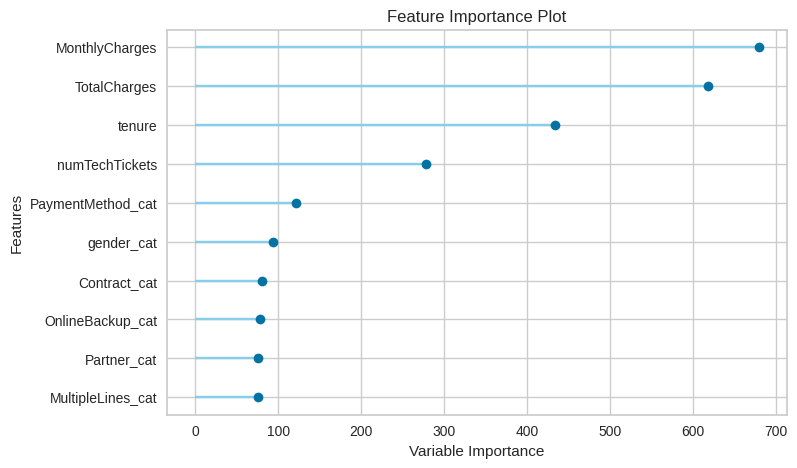

In [68]:
# plot feature importance
plot_model(best, plot = 'feature')